
Group A: Anais, Andreea y Mar

Countries assigned:
    Argentina, Russia, Colombia, Chile and Spain


Option C

1. Document all steps. Structure your code to keep it cleaned using good practices.

DONE: 2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data.

MAR: 3. Determine and explain if the data is cleaned. If not, then clean it.

4. Create an API that returns a Json with the logic explained for your group. The flask server must be executed running the src/api/server.py file.
5. Get the jsons generated from your annexed group and plot it. First, try to connect to the private ip of your     annexed group. If it is not possible because of physical issues, then simply use what they generate copying it. If your annexed group cannot give you the necessary json, then annotate it, use the json of another group.

ANAIS: 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date.

ANDREEA: 7. Draw the workflow of your program. You can use free tools.

8. Per country, which are the columns that are more related find the correlation between columns with the           correlation matrix.

DONE: 9. Use a different github repository adding all group participants with write permissions. Use that repository to manage the delivery code and resources. It is mandatory that every student of the group does, at least,five commits/push.

    10. Answer the questions:
        a. What position do your countries occupe respect to the number of total infected, total deaths and                 total recoveries?
        b. What can you conclude about your data study?
        c. Are there outliers or some rare data?



Our API must offer data to Group B and receive it from Group F, as follows:

    We have to offer a json(df):
    - Group A: it must return a json with one key “n_c_averages” that represents
    the mean of the “new_cases” per day of all of your countries.


    We should receive a json(df):
    - Group F: it must return a json with one key “n_t_averages” that represents the
    mean of the “new_tests” per day of all your countries.
    
Option B.... to be continued

In [1]:
#importamos librerias y funciones
import pandas as pd
import seaborn as sns
from utils.folders_tb import jsonlink_df
from utils.mining_data_tb import filter_df, df_covid, remove_outlier, datetime, data_complete_clean, data_paises_clean
from utils.visualization_tb import heatmap_df, detect_outliers_df, plot_per_column_distribution, plot_clean_columns

In [2]:
#Dataset total limpio 
covid_complete= data_complete_clean()
covid_complete

,location,population,life_expectancy,data.date,data.total_cases,data.new_cases,data.total_cases_per_million,data.new_cases_per_million,data.stringency_index,data.new_cases_smoothed,...,data.reproduction_rate,data.total_tests,data.total_tests_per_thousand,data.tests_units,data.new_tests_smoothed,data.new_tests_smoothed_per_thousand,data.positive_rate,data.tests_per_case,data.new_tests,data.new_tests_per_thousand
0,Afghanistan,38928341.0,64.83,2020-02-24,1.0,1.0,0.026,0.026,8.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,38928341.0,64.83,2020-02-25,1.0,0.0,0.026,0.000,8.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,38928341.0,64.83,2020-02-26,1.0,0.0,0.026,0.000,8.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,38928341.0,64.83,2020-02-27,1.0,0.0,0.026,0.000,8.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,38928341.0,64.83,2020-02-28,1.0,0.0,0.026,0.000,8.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60733,Zimbabwe,14862927.0,61.49,2021-01-15,26109.0,741.0,1756.653,49.856,87.04,921.286,...,NaN,267027.0,17.966,tests performed,3418.0,0.23,0.27,3.7,3386.0,0.228
60734,Zimbabwe,14862927.0,61.49,2021-01-16,26881.0,772.0,1808.594,51.941,87.04,911.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60735,Zimbabwe,14862927.0,61.49,2021-01-17,27203.0,322.0,1830.259,21.665,87.04,818.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60736,Zimbabwe,14862927.0,61.49,2021-01-18,27892.0,689.0,1876.616,46.357,NaN,799.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Dataset limpio filtrado por nuestros paises
covid_paises= data_paises_clean()
covid_paises

,location,population,life_expectancy,data.date,data.total_tests,data.new_tests,data.total_tests_per_thousand,data.new_tests_per_thousand,data.tests_units,data.stringency_index,...,data.total_deaths,data.new_deaths,data.new_deaths_smoothed,data.new_cases_smoothed_per_million,data.total_deaths_per_million,data.new_deaths_per_million,data.new_deaths_smoothed_per_million,data.positive_rate,data.tests_per_case,data.reproduction_rate
0,Argentina,45195777.0,76.67,2020-01-01,4.0,4.0,0.000,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,45195777.0,76.67,2020-01-02,14.0,10.0,0.000,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,45195777.0,76.67,2020-01-03,19.0,5.0,0.000,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,45195777.0,76.67,2020-01-04,31.0,12.0,0.001,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,45195777.0,76.67,2020-01-05,41.0,10.0,0.001,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Spain,46754783.0,83.56,2021-01-15,NaN,NaN,NaN,NaN,NaN,71.3,...,53314.0,235.0,205.714,616.603,1140.290,5.026,4.400,NaN,NaN,NaN
1742,Spain,46754783.0,83.56,2021-01-16,NaN,NaN,NaN,NaN,NaN,71.3,...,53314.0,0.0,205.714,616.603,1140.290,0.000,4.400,NaN,NaN,NaN
1743,Spain,46754783.0,83.56,2021-01-17,NaN,NaN,NaN,NaN,NaN,71.3,...,53314.0,0.0,205.714,616.603,1140.290,0.000,4.400,NaN,NaN,NaN
1744,Spain,46754783.0,83.56,2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,53769.0,455.0,213.429,686.466,1150.021,9.732,4.565,NaN,NaN,NaN


In [4]:
#Importamos el dataset actualizado
covid = jsonlink_df('https://covid.ourworldindata.org/data/owid-covid-data.json').T
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
AFG,Asia,Afghanistan,3.89283e+07,54.422,18.6,2.581,1.337,1803.99,597.029,9.59,37.746,0.5,64.83,0.498,"[{'date': '2020-02-24', 'total_cases': 1.0, 'n...",NaN,NaN,NaN
ALB,Europe,Albania,2.8778e+06,104.871,38,13.188,8.643,11803.4,304.195,10.08,NaN,2.89,78.57,0.785,"[{'date': '2020-03-09', 'total_cases': 2.0, 'n...",1.1,7.1,51.2
DZA,Africa,Algeria,4.3851e+07,17.348,29.1,6.211,3.857,13913.8,278.364,6.73,83.741,1.9,76.88,0.754,"[{'date': '2020-02-25', 'total_cases': 1.0, 'n...",0.5,0.7,30.4
AND,Europe,Andorra,77265,163.755,NaN,NaN,NaN,NaN,109.135,7.97,NaN,NaN,83.73,0.858,"[{'date': '2020-03-02', 'total_cases': 1.0, 'n...",NaN,29,37.8
AGO,Africa,Angola,3.28663e+07,23.89,16.8,2.405,1.362,5819.49,276.045,3.94,26.664,NaN,61.15,0.581,"[{'date': '2020-03-20', 'total_cases': 1.0, 'n...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,Asia,Vietnam,9.73386e+07,308.127,32.6,7.15,4.718,6171.88,245.465,6,85.847,2.6,75.4,0.694,"[{'date': '2020-01-23', 'total_cases': 2.0, 'n...",2,1,45.9
OWID_WRL,NaN,World,7.7948e+09,58.045,30.9,8.696,5.355,15469.2,233.07,8.51,60.13,2.705,72.58,NaN,"[{'date': '2020-01-22', 'total_cases': 557.0, ...",10,6.434,34.635
YEM,Asia,Yemen,2.9826e+07,53.508,20.3,2.922,1.583,1479.15,495.003,5.35,49.542,0.7,66.12,0.452,"[{'date': '2020-04-10', 'total_cases': 1.0, 'n...",18.8,7.6,29.2
ZMB,Africa,Zambia,1.8384e+07,22.995,17.7,2.48,1.542,3689.25,234.499,3.94,13.938,2,63.89,0.588,"[{'date': '2020-03-18', 'total_cases': 2.0, 'n...",57.5,3.1,24.7


In [5]:
#Filtramos nuestros paises
covid=filter_df(covid,'location','Argentina','Russia', 'Colombia', 'Chile', 'Spain')
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,data,extreme_poverty,female_smokers,male_smokers
ARG,South America,Argentina,4.51958e+07,16.177,31.9,11.198,7.441,18933.9,191.032,5.5,NaN,5,76.67,0.825,"[{'date': '2020-01-01', 'total_tests': 4.0, 'n...",0.6,16.2,27.7
CHL,South America,Chile,1.91162e+07,24.282,35.4,11.087,6.938,22767,127.993,8.46,NaN,2.11,80.18,0.843,"[{'date': '2020-02-23', 'total_cases': 2.0, 'n...",1.3,34.2,41.5
COL,South America,Colombia,5.08829e+07,44.223,32.2,7.646,4.312,13254.9,124.24,7.44,65.386,1.71,77.29,0.747,"[{'date': '2020-03-06', 'total_cases': 1.0, 'n...",4.5,4.7,13.5
RUS,Europe,Russia,1.45934e+08,8.823,39.6,14.178,9.393,24766,431.297,6.18,NaN,8.05,72.58,0.816,"[{'date': '2020-01-31', 'total_cases': 2.0, 'n...",0.1,23.4,58.3
ESP,Europe,Spain,4.67548e+07,93.105,45.5,19.436,13.799,34272.4,99.403,7.17,NaN,2.97,83.56,0.891,"[{'date': '2020-02-01', 'total_cases': 1.0, 'n...",1,27.4,31.4


In [6]:
#Extraemos la columna "data"
covid=df_covid(covid,val1="data")
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,...,data.new_vaccinations_smoothed_per_million,data.new_vaccinations,data.weekly_icu_admissions,data.weekly_icu_admissions_per_million,data.weekly_hosp_admissions,data.weekly_hosp_admissions_per_million,data.icu_patients,data.icu_patients_per_million,data.hosp_patients,data.hosp_patients_per_million
0,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1500.0,92764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Cambiamos la columna date a tipo datetime
covid= datetime(dt=covid, val1="data.date")
covid

,continent,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,...,data.new_vaccinations_smoothed_per_million,data.new_vaccinations,data.weekly_icu_admissions,data.weekly_icu_admissions_per_million,data.weekly_hosp_admissions,data.weekly_hosp_admissions_per_million,data.icu_patients,data.icu_patients_per_million,data.hosp_patients,data.hosp_patients_per_million
0,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South America,Argentina,45195777.0,16.177,31.9,11.198,7.441,18933.907,191.032,5.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1500.0,92764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1744,Europe,Spain,46754783.0,93.105,45.5,19.436,13.799,34272.360,99.403,7.17,...,1503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   1746 non-null   object        
 1   location                                    1746 non-null   object        
 2   population                                  1746 non-null   float64       
 3   population_density                          1746 non-null   float64       
 4   median_age                                  1746 non-null   float64       
 5   aged_65_older                               1746 non-null   float64       
 6   aged_70_older                               1746 non-null   float64       
 7   gdp_per_capita                              1746 non-null   float64       
 8   cardiovasc_death_rate                       1746 non-null   float64       
 9   diabetes

In [9]:
#eliminamos columnas con muchos Nan
covid= covid.drop(["continent", "extreme_poverty", "human_development_index","hospital_beds_per_thousand", "diabetes_prevalence","female_smokers","cardiovasc_death_rate", "aged_70_older", "aged_65_older", "median_age", "population_density", "gdp_per_capita", "male_smokers","data.new_vaccinations","data.total_vaccinations_per_hundred","data.total_vaccinations","data.weekly_hosp_admissions_per_million","data.weekly_hosp_admissions","data.weekly_icu_admissions_per_million","data.weekly_icu_admissions","data.new_vaccinations_smoothed","data.new_vaccinations_smoothed_per_million","data.hosp_patients","data.hosp_patients_per_million","data.icu_patients","data.icu_patients_per_million","handwashing_facilities"],axis=1)
covid

,location,population,life_expectancy,data.date,data.total_tests,data.new_tests,data.total_tests_per_thousand,data.new_tests_per_thousand,data.tests_units,data.stringency_index,...,data.total_deaths,data.new_deaths,data.new_deaths_smoothed,data.new_cases_smoothed_per_million,data.total_deaths_per_million,data.new_deaths_per_million,data.new_deaths_smoothed_per_million,data.positive_rate,data.tests_per_case,data.reproduction_rate
0,Argentina,45195777.0,76.67,2020-01-01,4.0,4.0,0.000,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,45195777.0,76.67,2020-01-02,14.0,10.0,0.000,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,45195777.0,76.67,2020-01-03,19.0,5.0,0.000,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,45195777.0,76.67,2020-01-04,31.0,12.0,0.001,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,45195777.0,76.67,2020-01-05,41.0,10.0,0.001,0.0,people tested,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Spain,46754783.0,83.56,2021-01-15,NaN,NaN,NaN,NaN,NaN,71.3,...,53314.0,235.0,205.714,616.603,1140.290,5.026,4.400,NaN,NaN,NaN
1742,Spain,46754783.0,83.56,2021-01-16,NaN,NaN,NaN,NaN,NaN,71.3,...,53314.0,0.0,205.714,616.603,1140.290,0.000,4.400,NaN,NaN,NaN
1743,Spain,46754783.0,83.56,2021-01-17,NaN,NaN,NaN,NaN,NaN,71.3,...,53314.0,0.0,205.714,616.603,1140.290,0.000,4.400,NaN,NaN,NaN
1744,Spain,46754783.0,83.56,2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,53769.0,455.0,213.429,686.466,1150.021,9.732,4.565,NaN,NaN,NaN


In [10]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests_per_thousand             589
data.new_tests                          589
data.total_tests_per_thousand           537
data.total_tests                        537
data.positive_rate                      364
data.tests_per_case                     364
data.new_tests_smoothed                 298
data.new_tests_smoothed_per_thousand    298
data.tests_units                        263
data.reproduction_rate                  248
data.new_deaths                         190
data.total_deaths_per_million           190
data.new_deaths_per_million             190
data.total_deaths                       190
data.new_cases_smoothed                  87
data.new_deaths_smoothed                 87
data.new_cases_smoothed_per_million      87
data.new_deaths_smoothed_per_million     87
data.new_cases                           62
data.total_cases                         62
data.total_cases_per_million             62
data.new_cases_per_million               62
data.stringency_index           

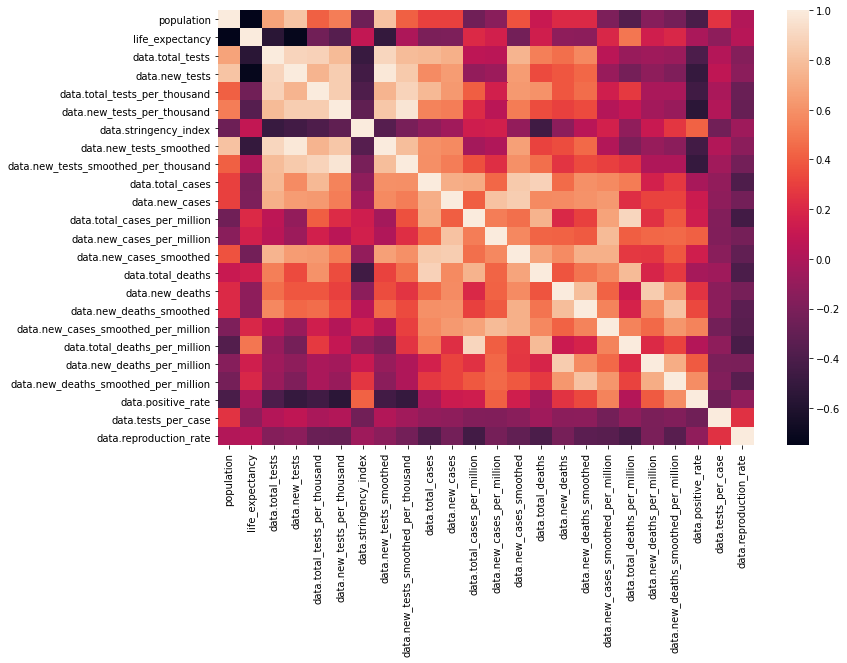

In [11]:
#matrix de correlación entre nuestras columnas
heatmap_df(df=covid, file_name='first_plot')

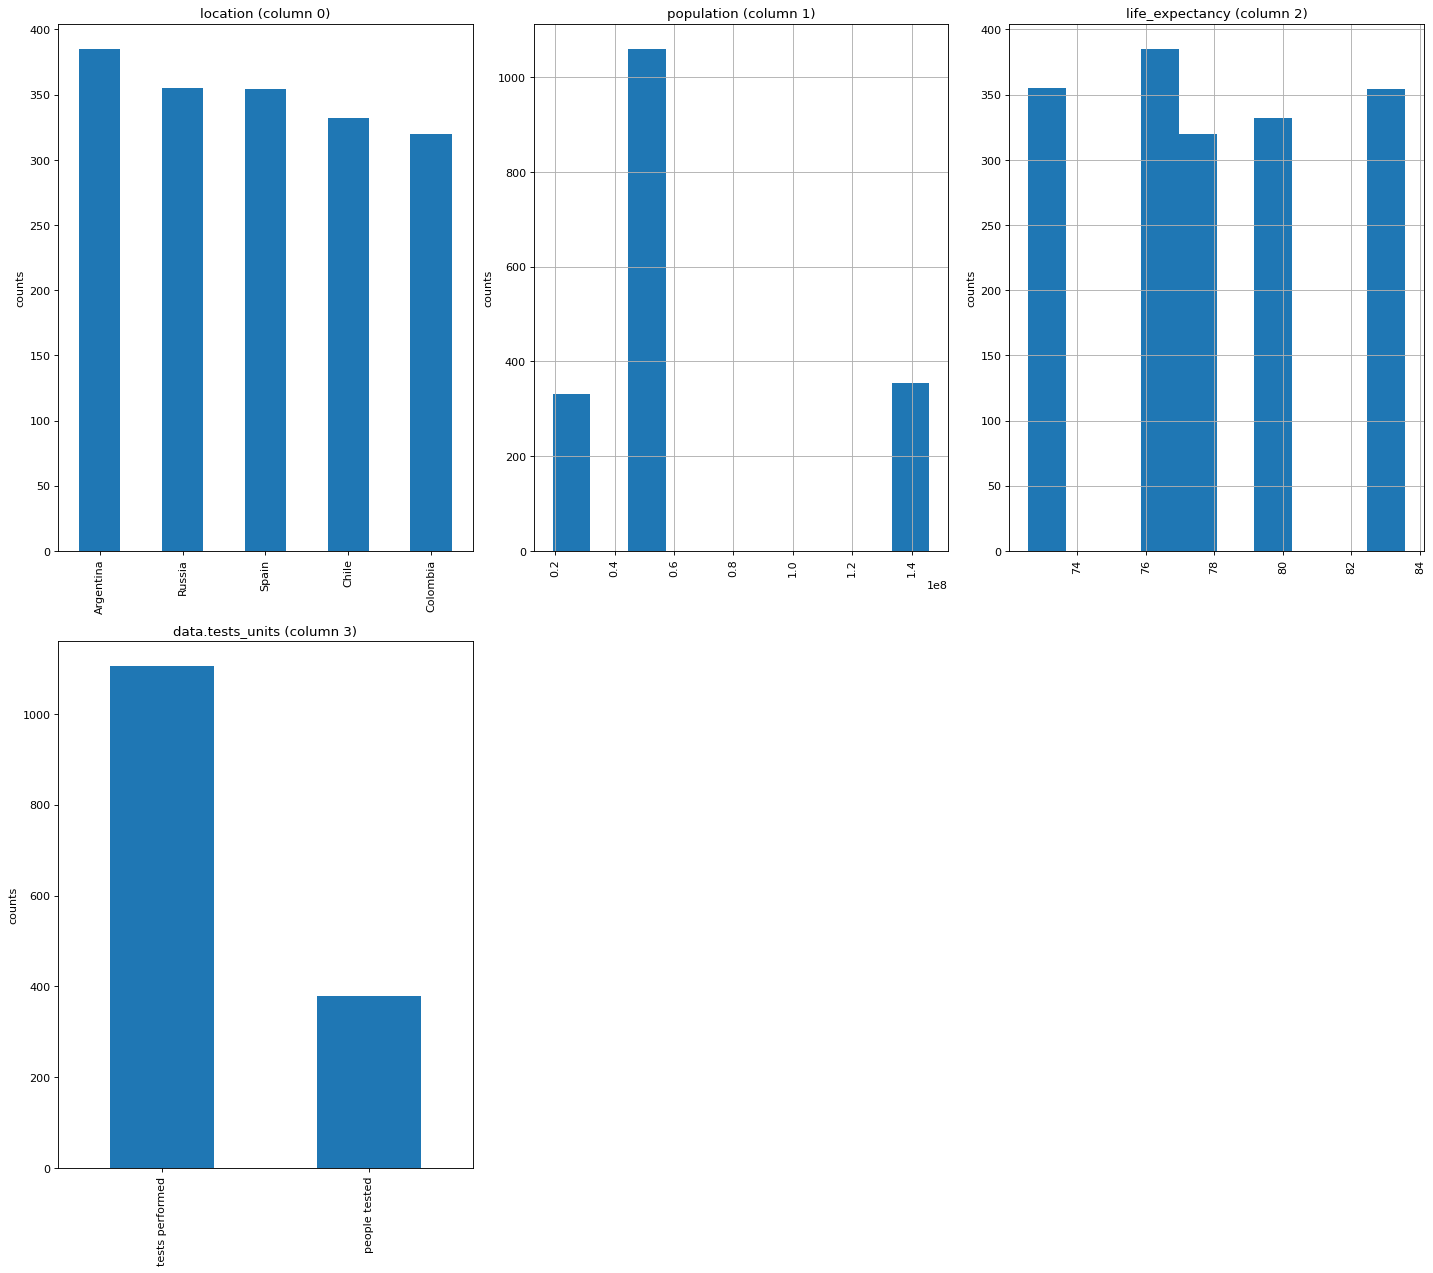

In [12]:
plot_per_column_distribution(covid,37,3,'hist one')

In [13]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests_per_thousand             589
data.new_tests                          589
data.total_tests_per_thousand           537
data.total_tests                        537
data.positive_rate                      364
data.tests_per_case                     364
data.new_tests_smoothed                 298
data.new_tests_smoothed_per_thousand    298
data.tests_units                        263
data.reproduction_rate                  248
data.new_deaths                         190
data.total_deaths_per_million           190
data.new_deaths_per_million             190
data.total_deaths                       190
data.new_cases_smoothed                  87
data.new_deaths_smoothed                 87
data.new_cases_smoothed_per_million      87
data.new_deaths_smoothed_per_million     87
data.new_cases                           62
data.total_cases                         62
data.total_cases_per_million             62
data.new_cases_per_million               62
data.stringency_index           

In [14]:
covid.set_index('data.date', inplace=True)
covid

,location,population,life_expectancy,data.total_tests,data.new_tests,data.total_tests_per_thousand,data.new_tests_per_thousand,data.tests_units,data.stringency_index,data.new_tests_smoothed,...,data.total_deaths,data.new_deaths,data.new_deaths_smoothed,data.new_cases_smoothed_per_million,data.total_deaths_per_million,data.new_deaths_per_million,data.new_deaths_smoothed_per_million,data.positive_rate,data.tests_per_case,data.reproduction_rate
data.date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Argentina,45195777.0,76.67,4.0,4.0,0.000,0.0,people tested,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,Argentina,45195777.0,76.67,14.0,10.0,0.000,0.0,people tested,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,Argentina,45195777.0,76.67,19.0,5.0,0.000,0.0,people tested,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,Argentina,45195777.0,76.67,31.0,12.0,0.001,0.0,people tested,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,Argentina,45195777.0,76.67,41.0,10.0,0.001,0.0,people tested,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,Spain,46754783.0,83.56,NaN,NaN,NaN,NaN,NaN,71.3,NaN,...,53314.0,235.0,205.714,616.603,1140.290,5.026,4.400,NaN,NaN,NaN
2021-01-16,Spain,46754783.0,83.56,NaN,NaN,NaN,NaN,NaN,71.3,NaN,...,53314.0,0.0,205.714,616.603,1140.290,0.000,4.400,NaN,NaN,NaN
2021-01-17,Spain,46754783.0,83.56,NaN,NaN,NaN,NaN,NaN,71.3,NaN,...,53314.0,0.0,205.714,616.603,1140.290,0.000,4.400,NaN,NaN,NaN


location                  5
data.stringency_index    68
dtype: int64
------
Argentina    362
Russia       355
Spain        352
Colombia     318
Chile        310
Name: location, dtype: int64
------
------


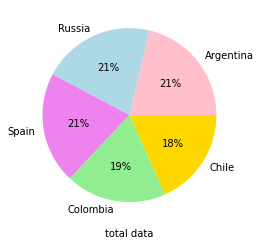

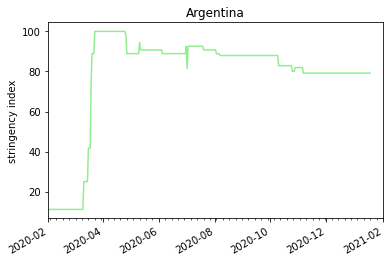

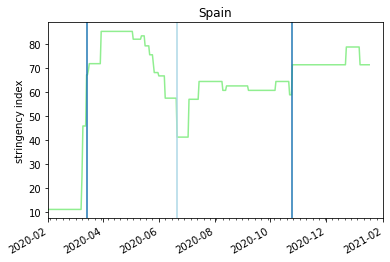

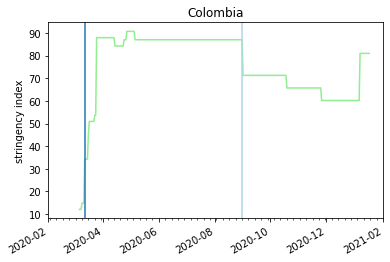

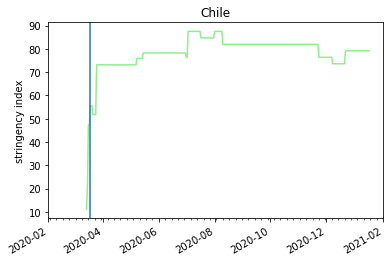

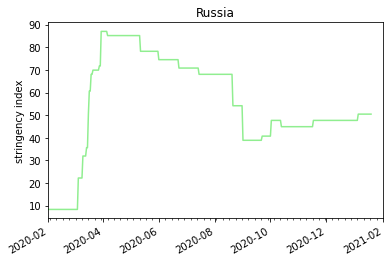

In [15]:
plot_clean_columns(df_name=covid, df_column='data.stringency_index', y_label='stringency index')

location             5
data.new_cases    1404
dtype: int64
------
Russia       320
Chile        319
Colombia     316
Argentina    314
Spain        265
Name: location, dtype: int64
------
------


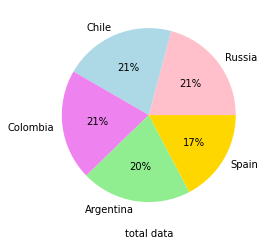

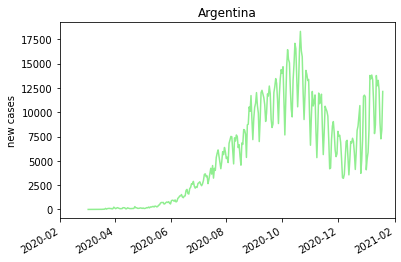

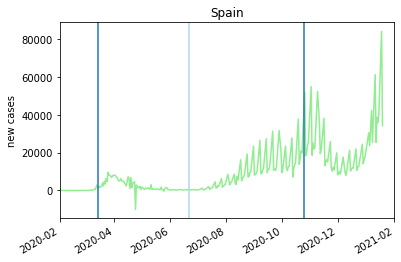

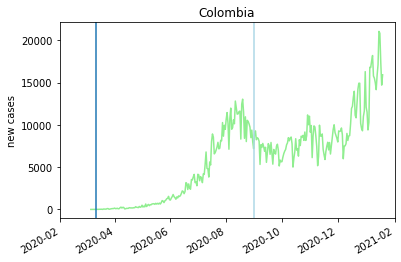

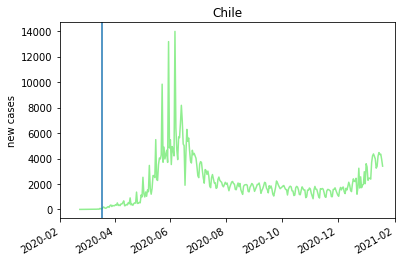

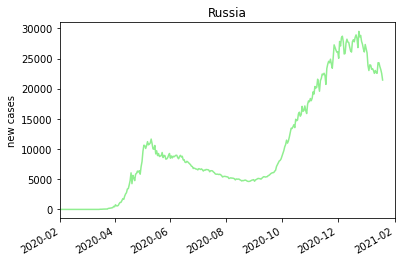

In [16]:
plot_clean_columns(df_name=covid, df_column='data.new_cases', y_label='new cases')

location               5
data.total_cases    1516
dtype: int64
------
Russia       355
Spain        354
Chile        332
Argentina    323
Colombia     320
Name: location, dtype: int64
------
------


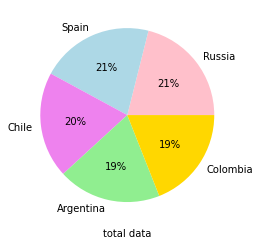

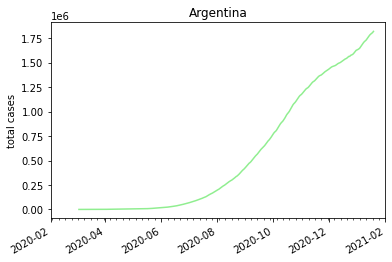

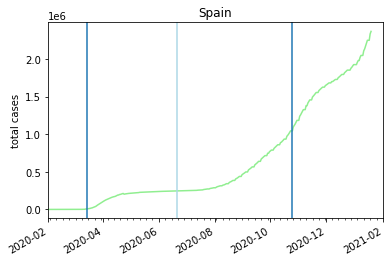

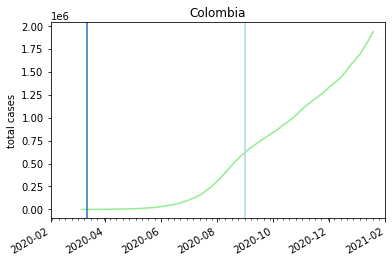

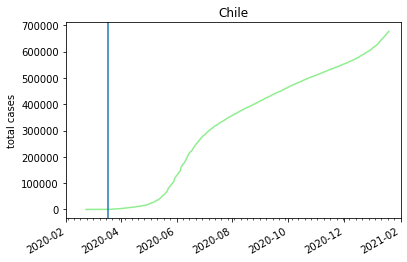

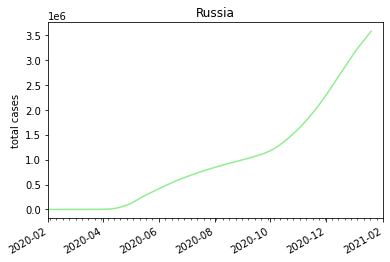

In [17]:
plot_clean_columns(df_name=covid, df_column='data.total_cases', y_label='total cases')

location                5
data.total_deaths    1380
dtype: int64
------
Spain        323
Argentina    318
Russia       307
Chile        304
Colombia     304
Name: location, dtype: int64
------
------


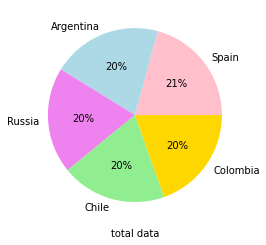

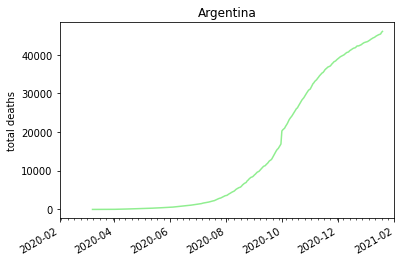

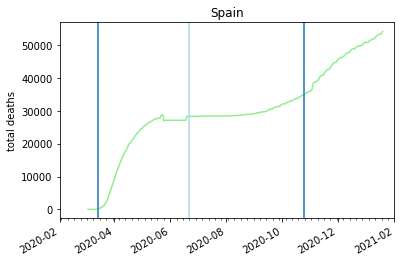

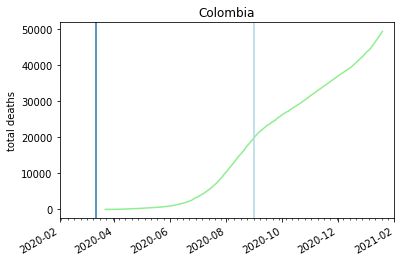

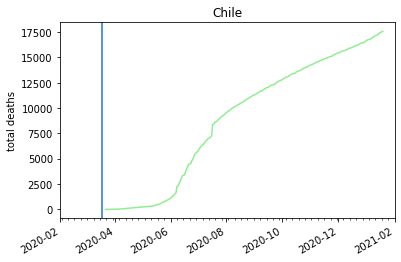

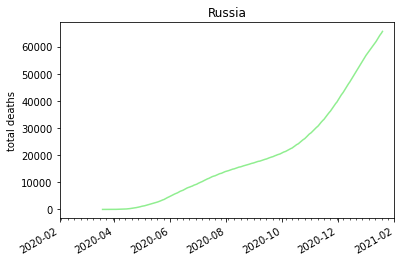

In [18]:
plot_clean_columns(df_name=covid, df_column='data.total_deaths', y_label='total deaths')

location             5
data.new_deaths    451
dtype: int64
------
Argentina    305
Chile        301
Russia       300
Colombia     297
Spain        243
Name: location, dtype: int64
------
------


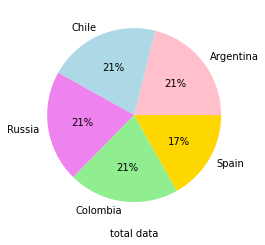

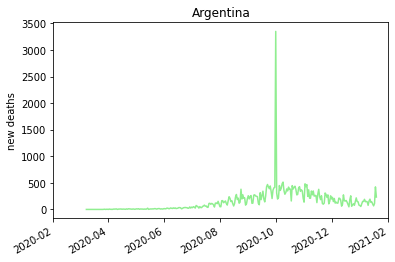

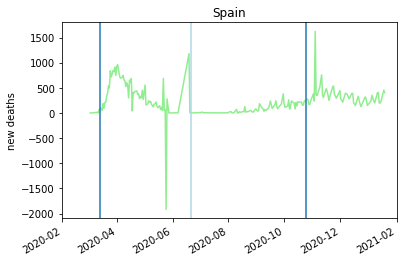

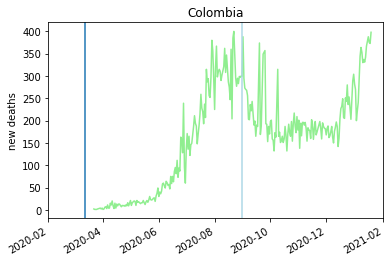

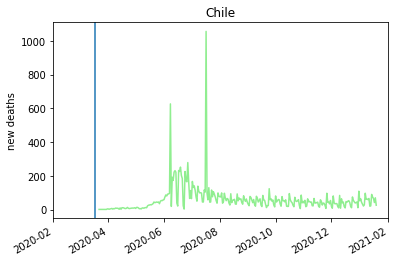

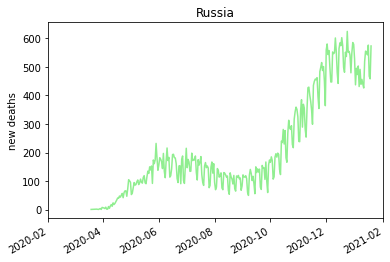

In [19]:
plot_clean_columns(df_name=covid, df_column='data.new_deaths', y_label='new deaths')

location                    5
data.reproduction_rate    149
dtype: int64
------
Spain        312
Chile        299
Russia       297
Colombia     296
Argentina    294
Name: location, dtype: int64
------
------


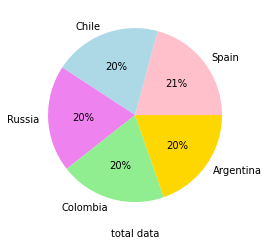

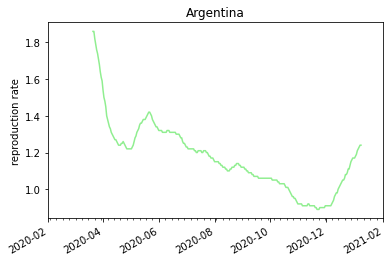

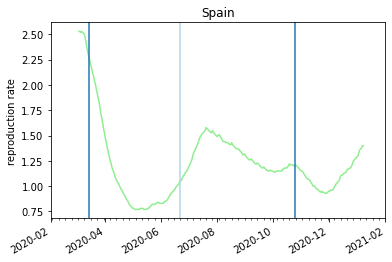

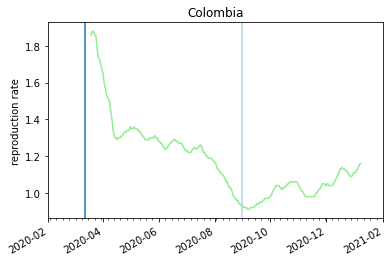

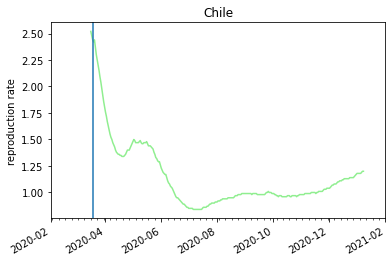

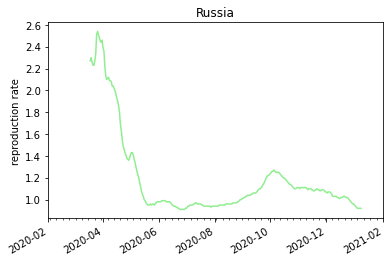

In [22]:
plot_clean_columns(df_name=covid, df_column='data.reproduction_rate', y_label='reproduction rate')

location                5
data.positive_rate    390
dtype: int64
------
Russia       313
Argentina    311
Chile        275
Spain        263
Colombia     220
Name: location, dtype: int64
------
------


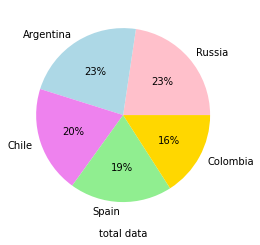

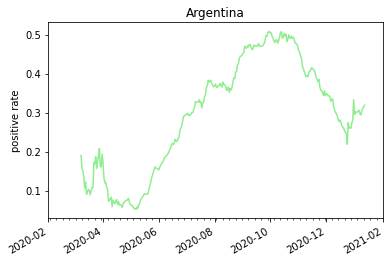

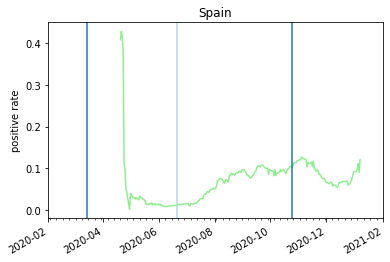

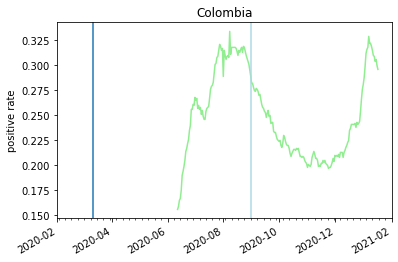

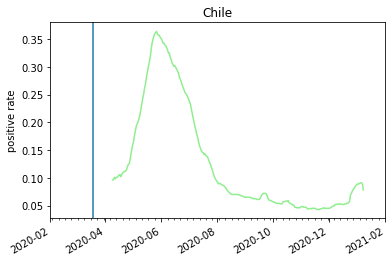

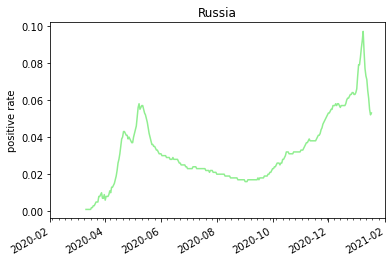

In [24]:
plot_clean_columns(df_name=covid, df_column='data.positive_rate', y_label='positive rate')

location                 5
data.tests_per_case    445
dtype: int64
------
Russia       313
Argentina    311
Chile        275
Spain        263
Colombia     220
Name: location, dtype: int64
------
------


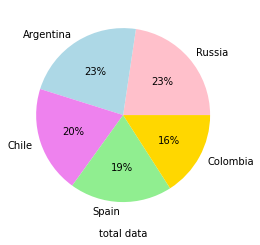

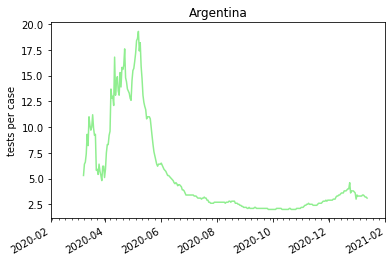

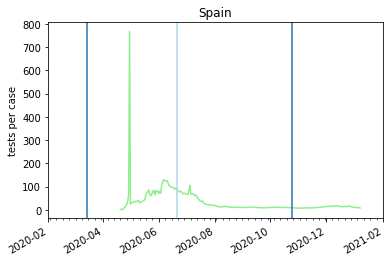

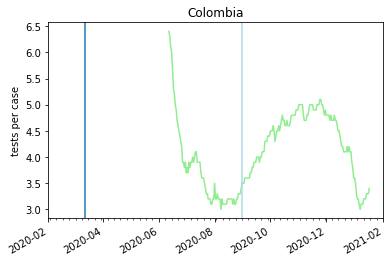

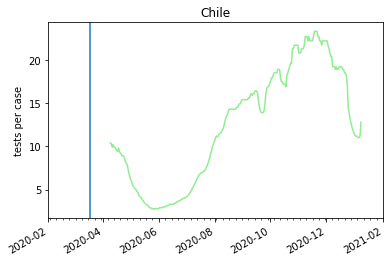

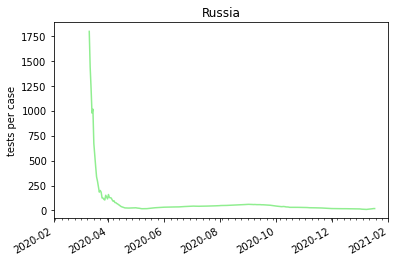

In [25]:
plot_clean_columns(df_name=covid, df_column='data.tests_per_case', y_label='tests per case')

location               5
data.total_tests    1209
dtype: int64
------
Argentina    345
Russia       311
Chile        284
Colombia     230
Spain         39
Name: location, dtype: int64
------
------


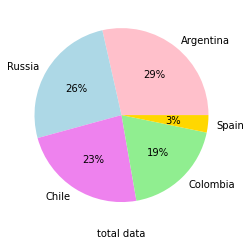

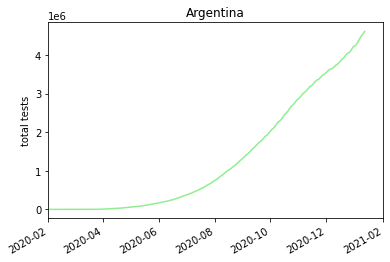

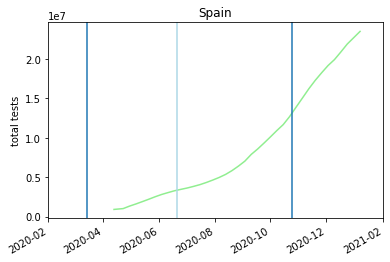

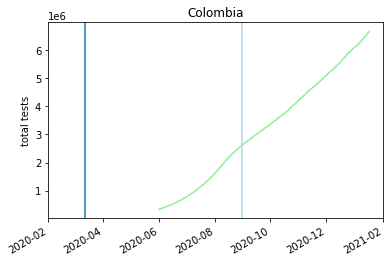

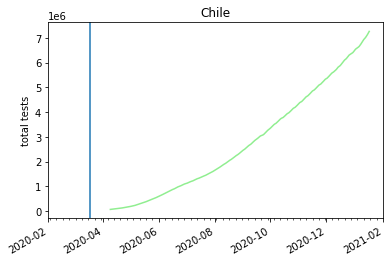

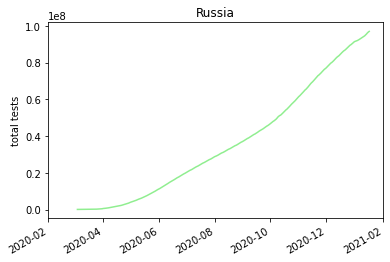

In [26]:
plot_clean_columns(df_name=covid, df_column='data.total_tests', y_label='total tests')

location             4
data.new_tests    1132
dtype: int64
------
Argentina    345
Russia       301
Chile        283
Colombia     228
Name: location, dtype: int64
------
------


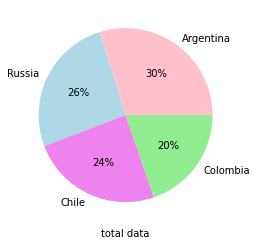

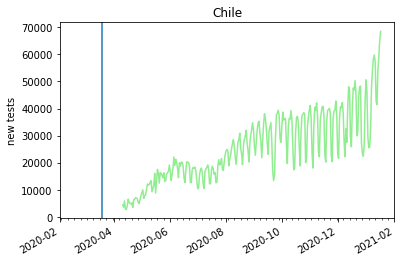

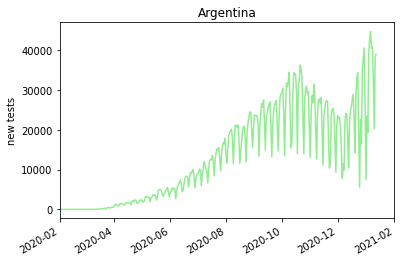

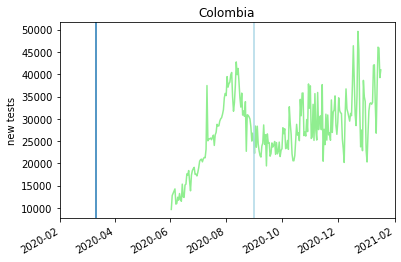

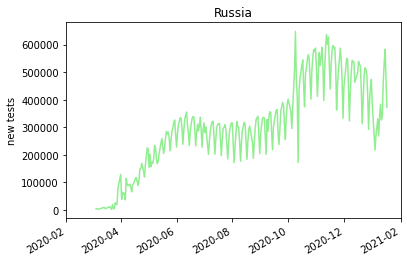

In [27]:
plot_clean_columns(df_name=covid, df_column='data.new_tests', y_label='new tests')